Load required libraries

In [2]:
%%capture
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import os

In [89]:
train_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_train"
test_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_test"
pred_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_pred"

Load images with TensorFlow

In [62]:
data = tf.keras.utils.image_dataset_from_directory(train_path,batch_size=16,shuffle=True)

Found 13116 files belonging to 6 classes.


In [63]:
test_data =tf.keras.utils.image_dataset_from_directory(test_path,image_size=(256,256),batch_size=16,shuffle=True,color_mode='rgb')

Found 2811 files belonging to 6 classes.


In [92]:
val_data = tf.keras.utils.image_dataset_from_directory(
    pred_path,
    labels=None,             # No subfolders = no labels
    shuffle=False,           # Optional: preserve order
    image_size=(224, 224),   # Set this to match your model’s input size
    batch_size=32            # Set your desired batch size
)

Found 6804 files.


To access the pipeline

In [64]:
data_iterator =data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001B3757BDF10>)

In [65]:
batch = data_iterator.next()
len(batch)   # images and labels

2

In [66]:
# Images represented as numpy array
batch[0].shape

(16, 256, 256, 3)

Look at a few pictures

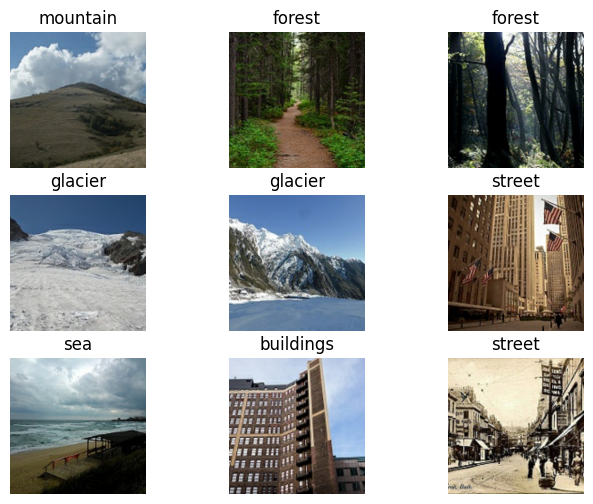

In [67]:
class_names = data.class_names

plt.figure(figsize=(8,6))
for image,labels in data.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

# Preprocess the data

In [54]:
for i, batch in enumerate(data.take(3)):
    # Do something with the batch
    print(f"Batch {i} shape:", batch)  # This will usually be a tuple (images, labels)

    first_three_batches = []

for batch in data.take(3):
    first_three_batches.append(batch)

Batch 0 shape: (<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
array([[[[1.11000000e+02, 1.56000000e+02, 1.98000000e+02],
         [1.11000000e+02, 1.56000000e+02, 1.98000000e+02],
         [1.11000000e+02, 1.56000000e+02, 1.98000000e+02],
         ...,
         [1.13000000e+02, 1.56000000e+02, 1.98000000e+02],
         [1.13000000e+02, 1.56000000e+02, 1.98000000e+02],
         [1.13000000e+02, 1.56000000e+02, 1.98000000e+02]],

        [[1.10242188e+02, 1.55242188e+02, 1.97242188e+02],
         [1.10242188e+02, 1.55242188e+02, 1.97242188e+02],
         [1.10242188e+02, 1.55242188e+02, 1.97242188e+02],
         ...,
         [1.12242188e+02, 1.55242188e+02, 1.97242188e+02],
         [1.12242188e+02, 1.55242188e+02, 1.97242188e+02],
         [1.12242188e+02, 1.55242188e+02, 1.97242188e+02]],

        [[1.09070312e+02, 1.54070312e+02, 1.96070312e+02],
         [1.09070312e+02, 1.54070312e+02, 1.96070312e+02],
         [1.09070312e+02, 1.54070312e+02, 1.96070312e+02],
        

In [55]:
first_three_batches[0:3]

[(<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
  array([[[[2.70000000e+01, 9.80000000e+01, 1.64000000e+02],
           [2.43476562e+01, 9.53476562e+01, 1.59832031e+02],
           [2.02460938e+01, 9.12460938e+01, 1.53386719e+02],
           ...,
           [1.94964844e+02, 2.19859375e+02, 2.39894531e+02],
           [1.94378906e+02, 2.17515625e+02, 2.38136719e+02],
           [1.94000000e+02, 2.16000000e+02, 2.37000000e+02]],
  
          [[3.04101562e+01, 1.00273438e+02, 1.65136719e+02],
           [2.81885223e+01, 9.80518036e+01, 1.61686600e+02],
           [2.47530060e+01, 9.46162872e+01, 1.56351364e+02],
           ...,
           [1.87234268e+02, 2.12494385e+02, 2.33652939e+02],
           [1.90422592e+02, 2.13702881e+02, 2.35225357e+02],
           [1.92484375e+02, 2.14484375e+02, 2.36242188e+02]],
  
          [[3.56835938e+01, 1.03789062e+02, 1.66894531e+02],
           [3.41280060e+01, 1.02233475e+02, 1.64554489e+02],
           [3.17224579e+01, 9.98279266e+01, 1

scale the data

In [70]:
print(batch[0].max())

255.0


In [71]:
data = data.map(lambda x,y: (x/255, y))

In [74]:
scaled_iterator =  data.as_numpy_iterator()

In [75]:
batch = scaled_iterator.next()

In [76]:
print(batch[0].max())

1.0


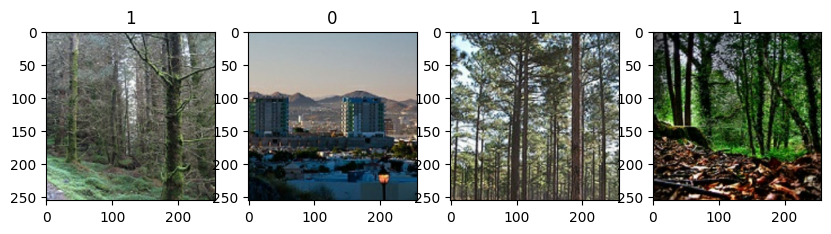

In [83]:
fig,ax = plt.subplots(ncols=4, figsize=(10,8))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Deep model

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [98]:
model = Sequential()

In [100]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [103]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,494 (490.21 KB)

 Trainable params: 125,494 (490.21 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [105]:
logdir='logs'

In [106]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir='logdir')

In [107]:
hist=model.fit(data,epochs=15,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/15
820/820 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.4957 - loss: 1.2285

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 400, but received input with shape (None, 256)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>